In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

A un valor de la capacitancia C fija, levantar distintas curvas de la corriente en función del tiempo,
i(t), para distintos valores de la resistencia R. Calcular los distintos tiempos de descarga del capacitor τ y comparar con la predicción teórica.

Valor fijo de C = 1000mF = 10^-6 

In [279]:
tiempo = np.arange(0, 5000, 1)
tiempo = list(tiempo)

In [274]:
# Definir la función exponencial con un término de desplazamiento -> fitear una exponencial con RC -> V = V0 * exp(-t/RC) + Vf

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [275]:
# predicción teórica

def tiempo_de_descarga(R, C):
    return R*C

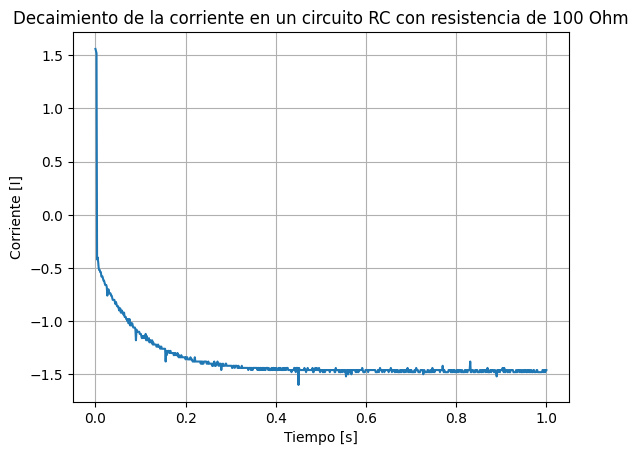

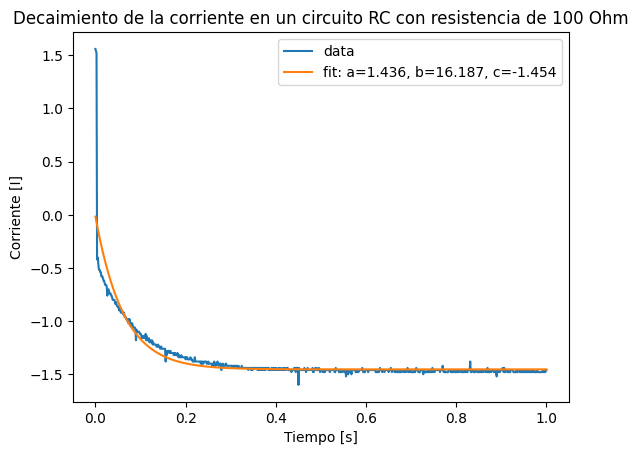

Optimal parameters: a=1.4362935643999404, b=16.187404342969813, c=-1.4538148870603127


In [280]:
# archivo 300 hz
# R = 100 ohm


data = pd.read_csv('scope_csv_16_0300hz.csv')

voltaje = (list(data['Time [s]'].values))

# recortamos solo la parte en que se reduce el voltaje
slice1 = tiempo.index(1267)
slice2 = tiempo.index(2103)

tiempo = tiempo[slice1:slice2]
voltaje = voltaje[slice1:slice2]
#print(voltaje.index(max(voltaje)))  

seg_ciclo = 1/300   # 1/300 Hz
tiempo = list(np.linspace(0, seg_ciclo, len(tiempo)))
tiempo_norm = (tiempo - tiempo[0]) / (tiempo[-1] - tiempo[0])

# cortamos 
#tiempo = tiempo[:len(voltaje)]

# una vez definido el tiempo, lo normalizamos

# graficamos
plt.plot(tiempo_norm, voltaje)
plt.xlabel('Tiempo [s]')
plt.ylabel('Corriente [I]')
plt.title('Decaimiento de la corriente en un circuito RC con resistencia de 100 Ohm')
plt.grid()
plt.show()

# Definir el rango para ajustar
fit_range_start = 1267
fit_range_end = 2103

# Estimación inicial para los parámetros
initial_guess = [max(voltaje) - min(voltaje), 1.0, min(voltaje)]

# Límites para los parámetros
param_bounds = ([0, 0, min(voltaje)], [np.inf, np.inf, max(voltaje)])

# Ajustar la curva
try:
    popt, pcov = curve_fit(func, tiempo_norm, voltaje, p0=initial_guess, bounds=param_bounds, maxfev=2000)

    # Graficar los datos y la curva ajustada
    plt.plot(tiempo_norm, voltaje, label='data')
    plt.plot(tiempo_norm, func(tiempo_norm, *popt), label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Corriente [I]')
    plt.title('Decaimiento de la corriente en un circuito RC con resistencia de 100 Ohm')
    plt.legend()
    plt.show()

    print(f'Optimal parameters: a={popt[0]}, b={popt[1]}, c={popt[2]}')

except RuntimeError as e:
    print(f'Error: {e}')

In [ ]:
tiempo = np.arange(0, 5000, 1)
tiempo = list(tiempo)

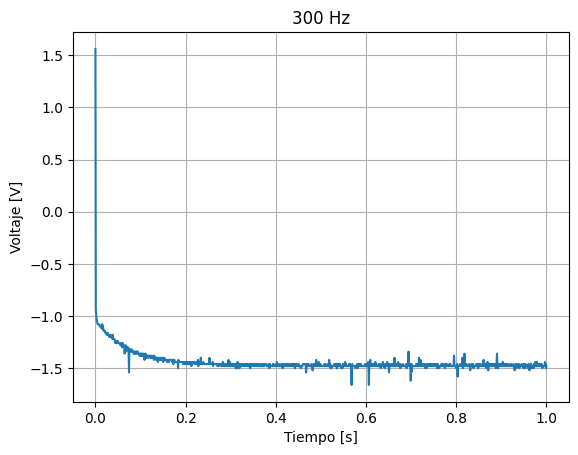

In [ ]:
# archivo 5100 mhz 300 ohms

data = pd.read_csv('scope_csv_16_5100mhz300ohms.csv')

tiempo = list(tiempo)
voltaje = (list(data['Time [s]'].values))

# recortamos solo la parte en que se reduce el voltaje
slice1 = tiempo.index(1607)
slice2 = tiempo.index(2858)

tiempo = tiempo[slice1:slice2]
voltaje = voltaje[slice1:slice2]
#print(voltaje.index(max(voltaje)))  

seg_ciclo = 1/5.1  # 1/5.1 MHz
tiempo = list(np.linspace(0, seg_ciclo, len(tiempo)))
tiempo_norm = (tiempo - tiempo[0]) / (tiempo[-1] - tiempo[0])


# recortamos 
#tiempo = tiempo[:len(voltaje)]

# graficamos
plt.plot(tiempo_norm, voltaje)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.title('300 Hz')
plt.grid()
plt.show()

In [ ]:
tiempo = np.arange(0, 5000, 1)
tiempo = list(tiempo)

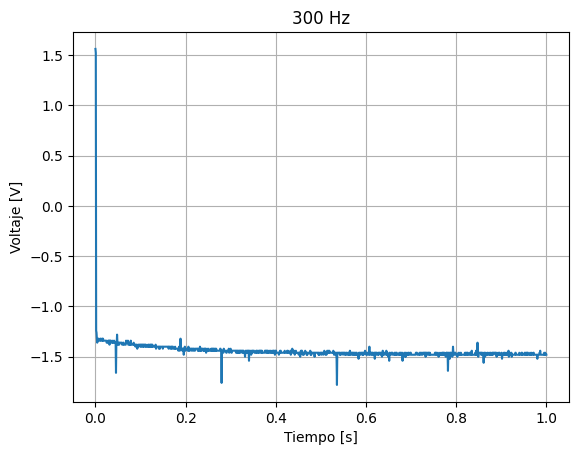

In [ ]:
# archivo 30100 mmhz

data = pd.read_csv('scope_csv_16_30100mmhz.csv')

tiempo = list(tiempo)
voltaje = (list(data['Time [s]'].values))

# recortamos solo la parte en que se reduce el voltaje
slice1 = tiempo.index(67)
slice2 = tiempo.index(1319)

tiempo = tiempo[slice1:slice2]
voltaje = voltaje[slice1:slice2]
#print(voltaje.index(max(voltaje)))  

seg_ciclo = 1/30.1  # 1/30.1 MHz
tiempo = list(np.linspace(0, seg_ciclo, len(tiempo)))
tiempo_norm = (tiempo - tiempo[0]) / (tiempo[-1] - tiempo[0])

# recortamos 
#tiempo = tiempo[:len(voltaje)]

# graficamos
plt.plot(tiempo_norm, voltaje)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.title('300 Hz')
plt.grid()
plt.show()

In [281]:
tiempo = np.arange(0, 5000, 1)
tiempo = list(tiempo)

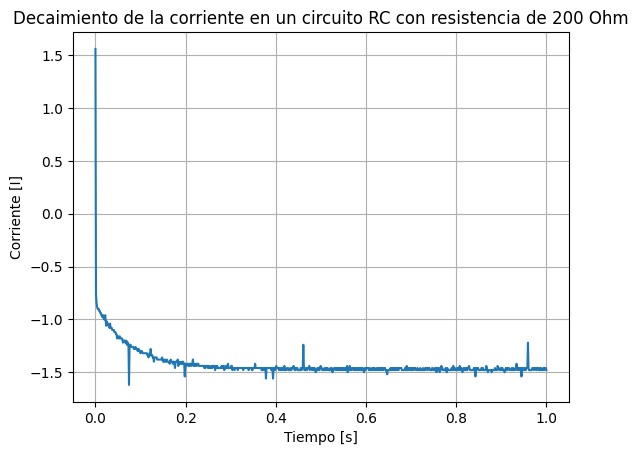

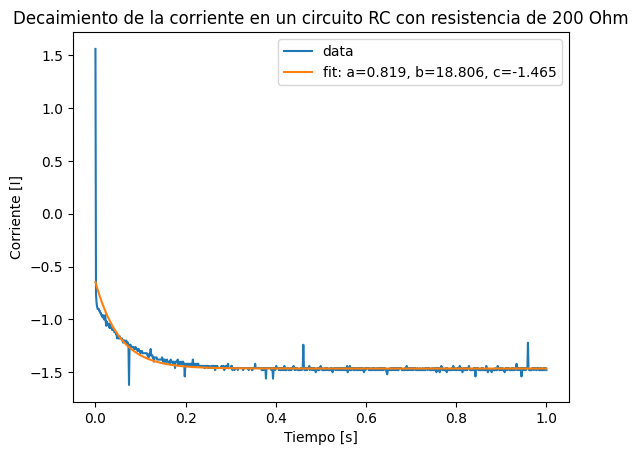

Optimal parameters: a=0.8189387293893711, b=18.805947159912403, c=-1.4647308035560014


In [282]:
# archivo 150 mhz

data = pd.read_csv('scope_csv_16_4150mhz.csv')

tiempo = list(tiempo)
voltaje = (list(data['Time [s]'].values))

# recortamos solo la parte en que se reduce el voltaje
slice1 = tiempo.index(261)
slice2 = tiempo.index(1095)

tiempo = tiempo[slice1:slice2]
voltaje = voltaje[slice1:slice2]
#print(voltaje.index(max(voltaje)))  

seg_ciclo = 1/4.15  # 1/4.15 MHz
tiempo = list(np.linspace(0, seg_ciclo, len(tiempo)))
tiempo_norm = (tiempo - tiempo[0]) / (tiempo[-1] - tiempo[0])

# recortamos 
tiempo = tiempo[:len(voltaje)]

# graficamos
plt.plot(tiempo_norm, voltaje)
plt.xlabel('Tiempo [s]')
plt.ylabel('Corriente [I]')
plt.title('Decaimiento de la corriente en un circuito RC con resistencia de 200 Ohm')
plt.grid()
plt.show()


# Definir el rango para ajustar
fit_range_start = 261
fit_range_end = 1095

# Estimación inicial para los parámetros
initial_guess = [max(voltaje) - min(voltaje), 1.0, min(voltaje)]

# Límites para los parámetros
param_bounds = ([0, 0, min(voltaje)], [np.inf, np.inf, max(voltaje)])

# Ajustar la curva
try:
    popt, pcov = curve_fit(func, tiempo_norm, voltaje, p0=initial_guess, bounds=param_bounds, maxfev=2000)

    # Graficar los datos y la curva ajustada
    plt.plot(tiempo_norm, voltaje, label='data')
    plt.plot(tiempo_norm, func(tiempo_norm, *popt), label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Corriente [I]')
    plt.title('Decaimiento de la corriente en un circuito RC con resistencia de 200 Ohm')
    plt.legend()
    plt.show()

    print(f'Optimal parameters: a={popt[0]}, b={popt[1]}, c={popt[2]}')

except RuntimeError as e:
    print(f'Error: {e}')

In [ ]:
tiempo = np.arange(0, 5000, 1)
tiempo = list(tiempo)

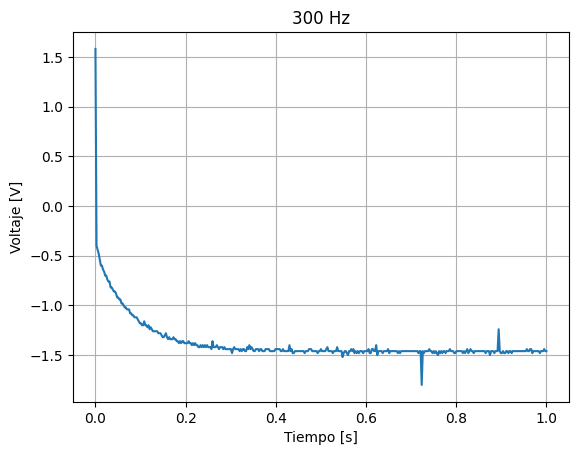

In [ ]:
# archivo 600 hz

data = pd.read_csv('scope_csv_16_26z600hz.csv')

tiempo = list(tiempo)
voltaje = (list(data['Time [s]'].values))

# recortamos solo la parte en que se reduce el voltaje
slice1 = tiempo.index(1023)
slice2 = tiempo.index(1440)

tiempo = tiempo[slice1:slice2]
voltaje = voltaje[slice1:slice2]
#print(voltaje.index(max(voltaje)))  

seg_ciclo = 1/600  # 1/600 Hz
tiempo = list(np.linspace(0, seg_ciclo, len(tiempo)))
tiempo_norm = (tiempo - tiempo[0]) / (tiempo[-1] - tiempo[0])

# recortamos 
#tiempo = tiempo[:len(voltaje)]

# graficamos
plt.plot(tiempo_norm, voltaje)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.title('300 Hz')
plt.grid()
plt.show()
